In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

In [1]:
from config import config
import pandas
import seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import papermill as pm
from stacked_data import stacked_data, stacked_single
from tqdm import tqdm
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, IsolationForest, RandomForestClassifier, VotingClassifier
from sklearn import metrics

from evaluate import calculate_confusion_matrix_stats, plot_roc_curve, plot_precision_recall, plot_confusion_matrix_ensemble

Using TensorFlow backend.


# Ensemble models

In [2]:
MODELS = [    
    "5d1d4156-ee5a-49ff-87cf-ad4a11be8aef", # t1
    "47cf8213-5aca-4e1f-b2ba-8dbf4aac7830", # t2
    "b0fb56eb-f2fa-4a5a-bd76-297ec64a371e", # features
]
SCORE = "accuracy"

In [3]:
models = MODELS
print("models: {}".format(models))

models: ['5d1d4156-ee5a-49ff-87cf-ad4a11be8aef', '47cf8213-5aca-4e1f-b2ba-8dbf4aac7830', 'b0fb56eb-f2fa-4a5a-bd76-297ec64a371e']


In [4]:
test_1_set, test_1_labels, test_1_dataset = stacked_single(
    models, 
    pickle="/data/intrepidlemon/renal/features/segmenter-3/training-features.pkl", 
    source="/data/intrepidlemon/renal/extra-segmentations/segmenter-3/"
)
test_2_set, test_2_labels, test_2_dataset = stacked_single(
    models, 
    pickle="/data/intrepidlemon/renal/features/segmenter-4/training-features.pkl", 
    source="/data/intrepidlemon/renal/extra-segmentations/segmenter-4/"
)
test_1_set = np.array(list(zip(*test_1_set)))
test_1_labels = np.array(test_1_labels)
test_2_set = np.array(list(zip(*test_2_set)))
test_2_labels = np.array(test_2_labels)

 47%|████▋     | 51/108 [00:25<00:35,  1.62it/s]


################################################################################
Exception occurred for: patient    Kidney-HP-001
volume       0.000229797
outcome        malignant
age             0.821918
sex                    0
sort          unassigned
Name: Kidney-HP-001, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/extra-segmentations/segmenter-3/Kidney-HP-001-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/extra-segmentati

 55%|█████▍    | 59/108 [00:30<00:30,  1.62it/s]


################################################################################
Exception occurred for: patient    Kidney-Mayo-024
volume         4.40363e-06
outcome             benign
age               0.534247
sex                      0
sort            unassigned
Name: Kidney-Mayo-024, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/extra-segmentations/segmenter-3/Kidney-Mayo-024-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/

 66%|██████▌   | 71/108 [00:36<00:32,  1.15it/s]


################################################################################
Exception occurred for: patient    Kidney-TCGA-037
volume          0.00373767
outcome          malignant
age               0.534247
sex                      0
sort            unassigned
Name: Kidney-TCGA-037, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/extra-segmentations/segmenter-3/Kidney-TCGA-037-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/

 48%|████▊     | 52/108 [00:12<00:13,  4.27it/s]


################################################################################
Exception occurred for: patient    Kidney-HP-001
volume       0.000229797
outcome        malignant
age             0.821918
sex                    0
sort          unassigned
Name: Kidney-HP-001, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/extra-segmentations/segmenter-3/Kidney-HP-001-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/extra-segmentat

 55%|█████▍    | 59/108 [00:14<00:19,  2.48it/s]


################################################################################
Exception occurred for: patient    Kidney-Mayo-024
volume         4.40363e-06
outcome             benign
age               0.534247
sex                      0
sort            unassigned
Name: Kidney-Mayo-024, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/extra-segmentations/segmenter-3/Kidney-Mayo-024-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal

 66%|██████▌   | 71/108 [00:16<00:08,  4.21it/s]


################################################################################
Exception occurred for: patient    Kidney-TCGA-037
volume          0.00373767
outcome          malignant
age               0.534247
sex                      0
sort            unassigned
Name: Kidney-TCGA-037, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/extra-segmentations/segmenter-3/Kidney-TCGA-037-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal

 47%|████▋     | 51/108 [00:19<00:35,  1.60it/s]


################################################################################
Exception occurred for: patient    Kidney-HP-001
volume       0.000229797
outcome        malignant
age             0.821918
sex                    0
sort          unassigned
Name: Kidney-HP-001, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/extra-segmentations/segmenter-3/Kidney-HP-001-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/extra-segmentati

 55%|█████▍    | 59/108 [00:23<00:30,  1.60it/s]


################################################################################
Exception occurred for: patient    Kidney-Mayo-024
volume         4.40363e-06
outcome             benign
age               0.534247
sex                      0
sort            unassigned
Name: Kidney-Mayo-024, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/extra-segmentations/segmenter-3/Kidney-Mayo-024-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/

 66%|██████▌   | 71/108 [00:28<00:26,  1.42it/s]


################################################################################
Exception occurred for: patient    Kidney-TCGA-037
volume          0.00373767
outcome          malignant
age               0.534247
sex                      0
sort            unassigned
Name: Kidney-TCGA-037, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/extra-segmentations/segmenter-3/Kidney-TCGA-037-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/

100%|██████████| 110/110 [00:47<00:00,  2.32it/s]


In [6]:
sd = stacked_data(uuids=models)

 20%|█▉        | 65/332 [00:12<00:43,  6.16it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-115
volume            0.658593
outcome          malignant
age               0.594595
sex                      0
Name: Kidney-Penn-115, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T1C-imagingVolume

 35%|███▍      | 115/332 [00:22<01:06,  3.26it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-153
volume            0.658695
outcome          malignant
age               0.540541
sex                      1
Name: Kidney-Penn-153, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T1C-imagingVolume

 48%|████▊     | 158/332 [00:29<00:23,  7.35it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-266
volume            0.658453
outcome          malignant
age               0.567568
sex                      1
Name: Kidney-Penn-266, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T1C-imagingVolume

 92%|█████████▏| 304/332 [00:56<00:08,  3.26it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-080
volume            0.660122
outcome             benign
age               0.756757
sex                      1
Name: Kidney-Penn-080, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T1C-imagingVolume

 57%|█████▋    | 54/94 [00:08<00:04,  8.93it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-029
volume            0.658486
outcome          malignant
age               0.581081
sex                      1
Name: Kidney-Penn-029, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T1C-imagingVolume

 82%|████████▏ | 77/94 [00:13<00:02,  5.87it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-007
volume            0.658458
outcome             benign
age               0.635135
sex                      1
Name: Kidney-Penn-007, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T1C-imagingVolume

 20%|█▉        | 65/332 [00:14<00:49,  5.39it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-115
volume            0.658593
outcome          malignant
age               0.594595
sex                      0
Name: Kidney-Penn-115, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T1C-imagingVolume

 35%|███▍      | 115/332 [00:25<01:22,  2.62it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-153
volume            0.658695
outcome          malignant
age               0.540541
sex                      1
Name: Kidney-Penn-153, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T1C-imagingVolume

 47%|████▋     | 157/332 [00:33<00:35,  5.00it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-266
volume            0.658453
outcome          malignant
age               0.567568
sex                      1
Name: Kidney-Penn-266, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T1C-imagingVolume

 92%|█████████▏| 304/332 [01:04<00:10,  2.62it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-080
volume            0.660122
outcome             benign
age               0.756757
sex                      1
Name: Kidney-Penn-080, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T1C-imagingVolume

 57%|█████▋    | 54/94 [00:10<00:05,  7.81it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-029
volume            0.658486
outcome          malignant
age               0.581081
sex                      1
Name: Kidney-Penn-029, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T1C-imagingVolume

 82%|████████▏ | 77/94 [00:15<00:03,  4.96it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-007
volume            0.658458
outcome             benign
age               0.635135
sex                      1
Name: Kidney-Penn-007, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T1C-imagingVolume

 20%|██        | 67/332 [00:05<00:16, 15.78it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-115
volume            0.658593
outcome          malignant
age               0.594595
sex                      0
Name: Kidney-Penn-115, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T2WI-imagingVolu

 35%|███▌      | 117/332 [00:09<00:20, 10.47it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-153
volume            0.658695
outcome          malignant
age               0.540541
sex                      1
Name: Kidney-Penn-153, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T2WI-imagingVolu

 48%|████▊     | 159/332 [00:13<00:13, 12.53it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-266
volume            0.658453
outcome          malignant
age               0.567568
sex                      1
Name: Kidney-Penn-266, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T2WI-imagingVolu

 92%|█████████▏| 305/332 [00:26<00:02, 10.05it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-080
volume            0.660122
outcome             benign
age               0.756757
sex                      1
Name: Kidney-Penn-080, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T2WI-imagingVolu

 55%|█████▌    | 52/94 [00:05<00:03, 10.73it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-029
volume            0.658486
outcome          malignant
age               0.581081
sex                      1
Name: Kidney-Penn-029, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T2WI-imagingVolu

 83%|████████▎ | 78/94 [00:06<00:01, 15.60it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-007
volume            0.658458
outcome             benign
age               0.635135
sex                      1
Name: Kidney-Penn-007, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T2WI-imagingVolu

 20%|██        | 67/332 [00:05<00:17, 15.35it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-115
volume            0.658593
outcome          malignant
age               0.594595
sex                      0
Name: Kidney-Penn-115, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T2WI-imagingVolu

 35%|███▌      | 117/332 [00:09<00:19, 10.85it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-153
volume            0.658695
outcome          malignant
age               0.540541
sex                      1
Name: Kidney-Penn-153, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T2WI-imagingVolu

 48%|████▊     | 159/332 [00:13<00:12, 13.42it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-266
volume            0.658453
outcome          malignant
age               0.567568
sex                      1
Name: Kidney-Penn-266, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T2WI-imagingVolu

 92%|█████████▏| 305/332 [00:25<00:02, 10.09it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-080
volume            0.660122
outcome             benign
age               0.756757
sex                      1
Name: Kidney-Penn-080, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T2WI-imagingVolu

 55%|█████▌    | 52/94 [00:05<00:04, 10.34it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-029
volume            0.658486
outcome          malignant
age               0.581081
sex                      1
Name: Kidney-Penn-029, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T2WI-imagingVolu

 83%|████████▎ | 78/94 [00:06<00:01, 15.47it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-007
volume            0.658458
outcome             benign
age               0.635135
sex                      1
Name: Kidney-Penn-007, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T2WI-imagingVolu

 20%|█▉        | 65/332 [00:14<00:48,  5.56it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-115
volume            0.658593
outcome          malignant
age               0.594595
sex                      0
Name: Kidney-Penn-115, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T1C-imagingVolume

 35%|███▍      | 115/332 [00:25<01:21,  2.66it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-153
volume            0.658695
outcome          malignant
age               0.540541
sex                      1
Name: Kidney-Penn-153, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T1C-imagingVolume

 47%|████▋     | 157/332 [00:33<00:34,  5.06it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-266
volume            0.658453
outcome          malignant
age               0.567568
sex                      1
Name: Kidney-Penn-266, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T1C-imagingVolume

 92%|█████████▏| 304/332 [01:04<00:10,  2.69it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-080
volume            0.660122
outcome             benign
age               0.756757
sex                      1
Name: Kidney-Penn-080, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T1C-imagingVolume

 56%|█████▋    | 53/94 [00:10<00:05,  7.36it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-029
volume            0.658486
outcome          malignant
age               0.581081
sex                      1
Name: Kidney-Penn-029, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T1C-imagingVolume

 82%|████████▏ | 77/94 [00:15<00:04,  4.03it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-007
volume            0.658458
outcome             benign
age               0.635135
sex                      1
Name: Kidney-Penn-007, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T1C-imagingVolume

 20%|█▉        | 65/332 [00:14<00:47,  5.58it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-115
volume            0.658593
outcome          malignant
age               0.594595
sex                      0
Name: Kidney-Penn-115, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T1C-imagingVolume

 35%|███▍      | 115/332 [00:25<01:22,  2.63it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-153
volume            0.658695
outcome          malignant
age               0.540541
sex                      1
Name: Kidney-Penn-153, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T1C-imagingVolume

 47%|████▋     | 157/332 [00:33<00:34,  5.03it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-266
volume            0.658453
outcome          malignant
age               0.567568
sex                      1
Name: Kidney-Penn-266, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T1C-imagingVolume

 92%|█████████▏| 304/332 [01:04<00:10,  2.68it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-080
volume            0.660122
outcome             benign
age               0.756757
sex                      1
Name: Kidney-Penn-080, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T1C-imagingVolume

 56%|█████▋    | 53/94 [00:10<00:05,  7.42it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-029
volume            0.658486
outcome          malignant
age               0.581081
sex                      1
Name: Kidney-Penn-029, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T1C-imagingVolume

 82%|████████▏ | 77/94 [00:15<00:04,  4.20it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-007
volume            0.658458
outcome             benign
age               0.635135
sex                      1
Name: Kidney-Penn-007, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T1C-imagingVolume

100%|██████████| 47/47 [00:08<00:00,  6.94it/s]


In [7]:
train_set = np.array(list(zip(*sd[0])))
validation_set = np.array(list(zip(*sd[1])))
test_set = np.array(list(zip(*sd[2])))
train_labels = np.array(sd[3])
validation_labels = np.array(sd[4])
test_labels = np.array(sd[5])
train_fix_set = np.array(list(zip(*sd[6])))
train_fix_labels = np.array(sd[7])

In [8]:
CLASSIFIERS = [
    ExtraTreesClassifier,
    AdaBoostClassifier, 
    BaggingClassifier, 
    GradientBoostingClassifier, 
    RandomForestClassifier, 
]
PARAMETERS = [
    dict(max_leaf_nodes=5, max_depth=2), 
    dict(),   
    dict(n_estimators=20, max_samples=0.1, max_features=1),
    dict(),     
    dict(),     
]

In [1]:
def score_accuracy(model, x, y): 
    return metrics.accuracy_score(y, model.predict(x))

def score_roc_auc(model, x, y): 
    return metrics.roc_auc_score(y, model.predict_proba(x)[:,1])

def score_specificity(model, x, y): 
    return metrics.precision_score(y, model.predict(x))

def score_sensitivity(model, x, y): 
    return metrics.recall_score(y, model.predict(x))

SCORES = {
    "accuracy": score_accuracy, 
    "roc_auc": score_roc_auc, 
    "specificity": score_specificity,
    "sensitivity": score_sensitivity,
}

In [9]:
best_acc = 0
best_model = None
for j, c in enumerate(CLASSIFIERS): 
    model_best = 0
    model_acc = 0
    for i in tqdm(range(1000)): 
        clf = c(random_state=i, **(PARAMETERS[j]))
        clf.fit(train_set, train_labels)
        score = SCORES[SCORE](clf, validation_set, validation_labels)
        if score > best_acc:
            best_acc = score
            best_model = clf
        if score > model_acc:
            model_acc = score
            model_best = clf
    print(model_acc)
    print(model_best)
    print(best_acc)
    print(best_model)

100%|██████████| 1000/1000 [00:27<00:00, 37.08it/s]

0.8260869565217391
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1, max_samples=0.1,
         n_estimators=20, n_jobs=None, oob_score=False, random_state=511,
         verbose=0, warm_start=False)
0.8260869565217391
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1, max_samples=0.1,
         n_estimators=20, n_jobs=None, oob_score=False, random_state=511,
         verbose=0, warm_start=False)


In [10]:
print("train accuracy: {}".format(best_model.score(train_fix_set, train_fix_labels)))
print("validation accuracy: {}".format(best_model.score(validation_set, validation_labels)))
print("test accuracy: {}".format(best_model.score(test_set, test_labels)))

train accuracy: 0.926829268292683
validation accuracy: 0.8260869565217391
test accuracy: 0.8723404255319149


In [11]:
best_model

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1, max_samples=0.1,
         n_estimators=20, n_jobs=None, oob_score=False, random_state=511,
         verbose=0, warm_start=False)

In [14]:
def evaluation(name, dataset, labels): 
    model = best_model
    predictions = model.predict(dataset)
    probabilities = model.predict_proba(dataset)
    pm.record("{}_labels".format(name), list(labels))
    pm.record("{}_probabilities".format(name), list(probabilities[:,1]))
    pm.record("{}_predictions".format(name), list(predictions))
    print("accuracy: {}".format(metrics.accuracy_score(labels, predictions)))
    fig = plot_confusion_matrix_ensemble(labels, predictions, ["benign", "malignant"])
    fig.savefig("figures/ensemble-{}-confusion-matrix.svg".format(name), bbox_inches = "tight")
    fig.show()
    print(pandas.DataFrame(calculate_confusion_matrix_stats(labels, probabilities[:,1])))
    fig = plot_roc_curve(labels, probabilities[:,1])
    fig.savefig("figures/ensemble-{}-roc-curve.svg".format(name), bbox_inches = "tight")
    fig.show()
    fig = plot_precision_recall(labels, probabilities[:,1])
    fig.savefig("figures/ensemble-{}-precisionrecall.svg".format(name), bbox_inches = "tight")
    fig.show()

# Training

No handles with labels found to put in legend.


accuracy: 0.926829268292683
        Acc   TP   TN  FP  FN       TPR       TNR       PPV       NPV  \
0  0.926829   53  251   6  18  0.746479  0.976654  0.898305  0.933086   
1  0.926829  251   53  18   6  0.976654  0.746479  0.933086  0.898305   

        FPR       FNR       FDR        AM        GM  
0  0.023346  0.253521  0.101695  0.861566  0.853845  
1  0.253521  0.023346  0.066914  0.861566  0.853845  


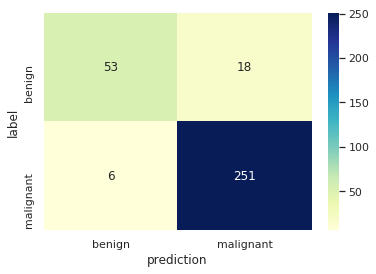

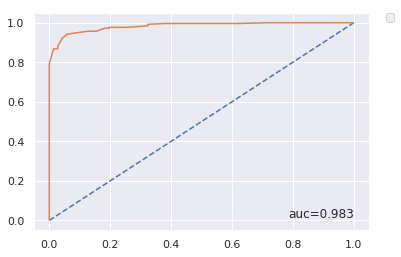

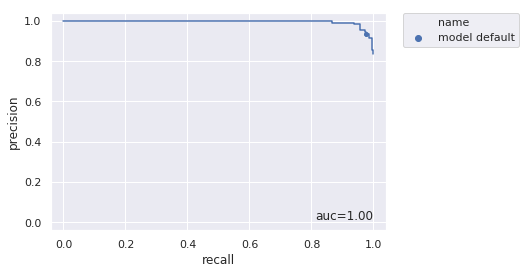

In [15]:
evaluation("train", train_fix_set, train_fix_labels)

# Validation

No handles with labels found to put in legend.


accuracy: 0.8260869565217391
        Acc  TP  TN  FP  FN       TPR       TNR       PPV       NPV       FPR  \
0  0.826087   4  72   1  15  0.210526  0.986301  0.800000  0.827586  0.013699   
1  0.826087  72   4  15   1  0.986301  0.210526  0.827586  0.800000  0.789474   

        FNR       FDR        AM        GM  
0  0.789474  0.200000  0.598414  0.455678  
1  0.013699  0.172414  0.598414  0.455678  


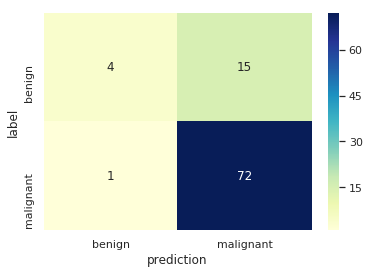

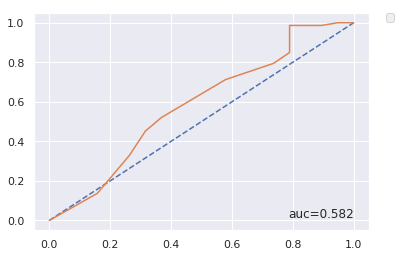

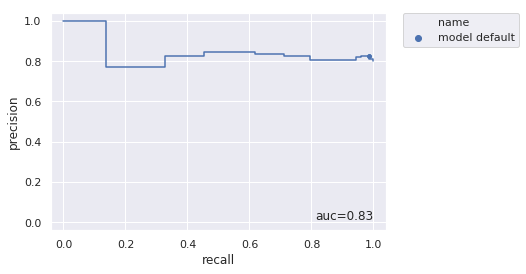

In [16]:
evaluation("validation", validation_set, validation_labels)

# Test

No handles with labels found to put in legend.


accuracy: 0.8723404255319149
       Acc  TP  TN  FP  FN  TPR  TNR       PPV       NPV  FPR  FNR       FDR  \
0  0.87234   4  37   0   6  0.4  1.0  1.000000  0.860465  0.0  0.6  0.000000   
1  0.87234  37   4   6   0  1.0  0.4  0.860465  1.000000  0.6  0.0  0.139535   

    AM        GM  
0  0.7  0.632456  
1  0.7  0.632456  


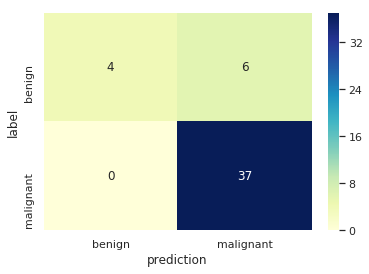

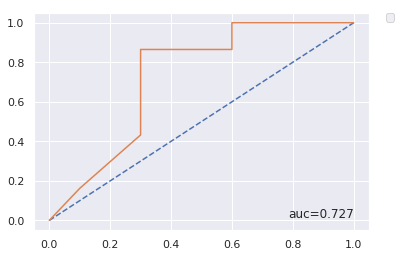

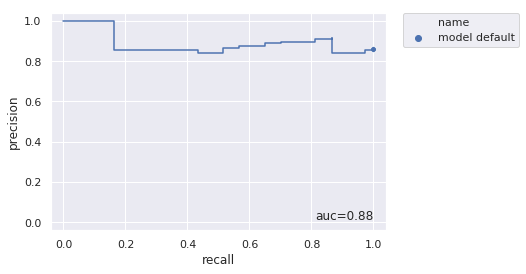

In [17]:
evaluation("test", test_set, test_labels)

accuracy: 0.7659574468085106


No handles with labels found to put in legend.


        Acc  TP  TN  FP  FN       TPR       TNR       PPV       NPV       FPR  \
0  0.765957   1  35   2   9  0.100000  0.945946  0.333333  0.795455  0.054054   
1  0.765957  35   1   9   2  0.945946  0.100000  0.795455  0.333333  0.900000   

        FNR       FDR        AM        GM  
0  0.900000  0.666667  0.522973  0.307562  
1  0.054054  0.204545  0.522973  0.307562  


/home/user1/intrepidlemon/renal-mri/evaluate.py:85: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
/home/user1/intrepidlemon/renal-mri/evaluate.py:87: RuntimeWarning: invalid value encountered in true_divide
  NPV = TN/(TN+FN)
/home/user1/intrepidlemon/renal-mri/evaluate.py:93: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)
No handles with labels found to put in legend.


accuracy: 0.7872340425531915
        Acc  TP  TN  FP  FN  TPR  TNR       PPV       NPV  FPR  FNR       FDR  \
0  0.787234   0  37   0  10  0.0  1.0       NaN  0.787234  0.0  1.0       NaN   
1  0.787234  37   0  10   0  1.0  0.0  0.787234       NaN  1.0  0.0  0.212766   

    AM   GM  
0  0.5  0.0  
1  0.5  0.0  


/home/user1/intrepidlemon/renal-mri/evaluate.py:85: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
/home/user1/intrepidlemon/renal-mri/evaluate.py:87: RuntimeWarning: invalid value encountered in true_divide
  NPV = TN/(TN+FN)
/home/user1/intrepidlemon/renal-mri/evaluate.py:93: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


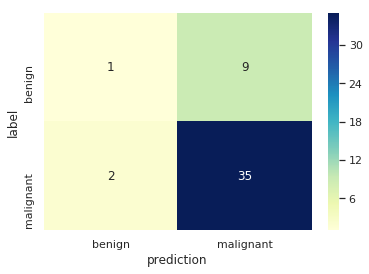

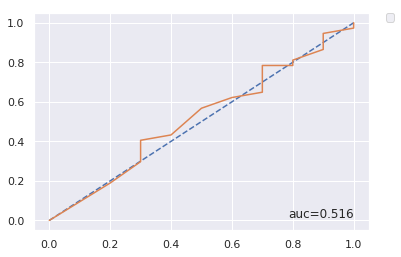

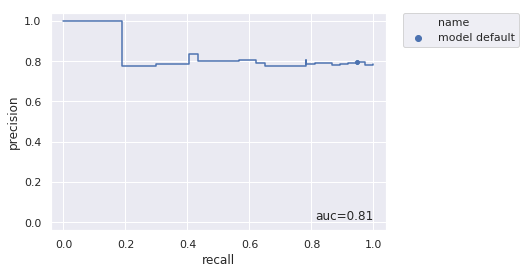

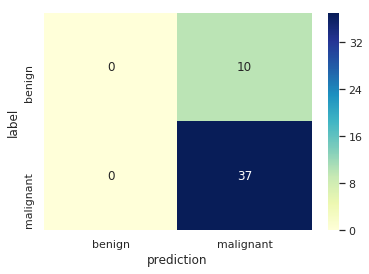

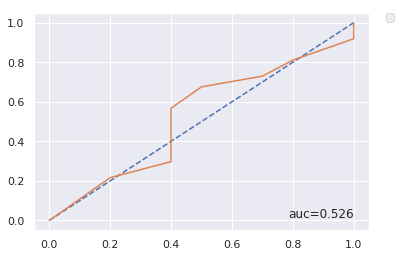

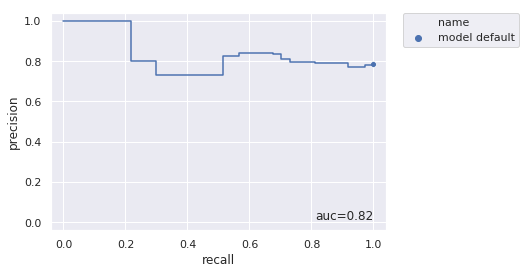

In [23]:
evaluation("test-1", test_1_set, test_1_labels)
evaluation("test-2", test_2_set, test_2_labels)

In [19]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')